In [113]:

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

df = pd.read_csv('heart.csv')

In [114]:
#wyświetl dane

df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [115]:
from sklearn import preprocessing as p
from sklearn.model_selection import train_test_split

#standaryzuj dane (bez ostatniej kolumny!)

data = np.asarray(df)
X = data[:,:-1]
y = data[:,-1]


data_ss = p.StandardScaler().fit_transform(X)
data_ss

#podziel dane na zbiór treningowy i walidacyjny

X_train, X_val, y_train, y_val = train_test_split(data_ss, y, train_size = 0.8, random_state=42)

mamy 13 danych, one wchodzą na 8 neuronów
funkcja aktywacji relu - (ostatni neuron mamy jeden) wszystkie wartości wychodzące z neuronu jeśli są poniżej 0 to je zeruje (czyli nie chce mieć wartości ujemnych) a dodatnie po prostu przepisuje 
no i na końcu mamy jeden neuron

In [116]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense
#pierwsza siec neuronowa
model = Sequential([
        Input(shape = (13)),
        Dense(8, activation = 'relu'),
        Dense(1)
])

In [117]:
#podsumowanie budowy i wielkości modelu
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 8)                 112       
                                                                 
 dense_38 (Dense)            (None, 1)                 9         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


dense - pierwsza warstwa ukryta - 8 neuronów
params - liczba wag do policzenia 

In [118]:
#kompilowanie modelu
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

dodajemy optymalizator, funkcję straty - czyli sposób liczenia błędu, 


In [119]:
#proces uczenia
EPOCHS = 100

history = model.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_val, y_val))

Epoch 1/100
8/8 [==============================] - 1s 26ms/step - loss: 5.2000 - accuracy: 0.5124 - val_loss: 5.6817 - val_accuracy: 0.5410
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 4.7422 - accuracy: 0.5248 - val_loss: 4.8390 - val_accuracy: 0.5574
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 4.4538 - accuracy: 0.5413 - val_loss: 4.7092 - val_accuracy: 0.5738
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 4.3480 - accuracy: 0.5455 - val_loss: 4.6917 - val_accuracy: 0.5738
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 4.3127 - accuracy: 0.5455 - val_loss: 4.5530 - val_accuracy: 0.5738
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 4.2368 - accuracy: 0.5455 - val_loss: 4.5310 - val_accuracy: 0.5738
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 4.1989 - accuracy: 0.5455 - val_loss: 4.5072 - val_accuracy: 0.5738
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 5ms/step - loss: 2.2693 - accuracy: 0.7107 - val_loss: 2.4780 - val_accuracy: 0.6557
Epoch 60/100
8/8 [==============================] - 0s 4ms/step - loss: 2.2661 - accuracy: 0.7107 - val_loss: 2.4727 - val_accuracy: 0.6557
Epoch 61/100
8/8 [==============================] - 0s 4ms/step - loss: 2.2634 - accuracy: 0.7107 - val_loss: 2.4693 - val_accuracy: 0.6557
Epoch 62/100
8/8 [==============================] - 0s 4ms/step - loss: 2.2611 - accuracy: 0.7107 - val_loss: 2.4675 - val_accuracy: 0.6557
Epoch 63/100
8/8 [==============================] - 0s 4ms/step - loss: 2.2585 - accuracy: 0.7149 - val_loss: 2.4654 - val_accuracy: 0.6557
Epoch 64/100
8/8 [==============================] - 0s 4ms/step - loss: 2.2562 - accuracy: 0.7149 - val_loss: 2.4639 - val_accuracy: 0.6557
Epoch 65/100
8/8 [==============================] - 0s 4ms/step - loss: 2.2540 - accuracy: 0.7149 - val_loss: 2.4620 - val_accuracy: 0.6557
Epoch 66/100
8/8 [===============

EPOCHS - liczba epok; ile razy będzie powtarzać uczenie
loss i accuracy - obliczoone na podstawie zbioru treningowego
val_accuracy sprawdza jak on się zachowuje w przypadku nowych danych (zapobiegamy przeuczeniu) 

In [120]:
#zamiana wyników zapisanych w history na dataframe
hist = pd.DataFrame(history.history)

In [121]:
#wyświetl hist
hist

,loss,accuracy,val_loss,val_accuracy
0,5.199984,0.512397,5.681744,0.540984
1,4.742208,0.524793,4.839019,0.557377
2,4.453787,0.541322,4.709151,0.573770
3,4.348005,0.545455,4.691665,0.573770
4,4.312741,0.545455,4.553047,0.573770
...,...,...,...,...
95,2.025141,0.743802,1.998129,0.704918
96,2.023631,0.743802,1.996815,0.704918
97,2.022302,0.743802,1.995442,0.704918
98,2.021085,0.743802,1.994501,0.704918


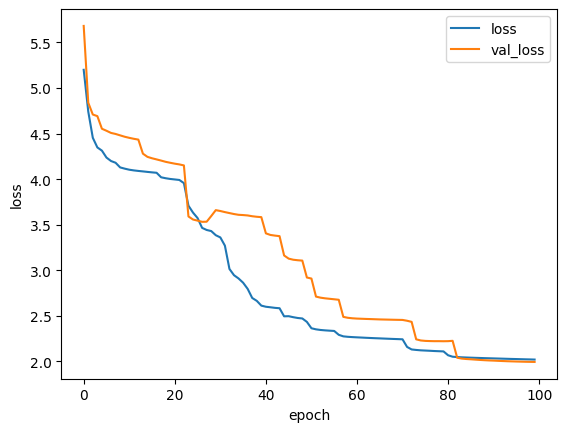

In [122]:
#proces uczenia na wykresie
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

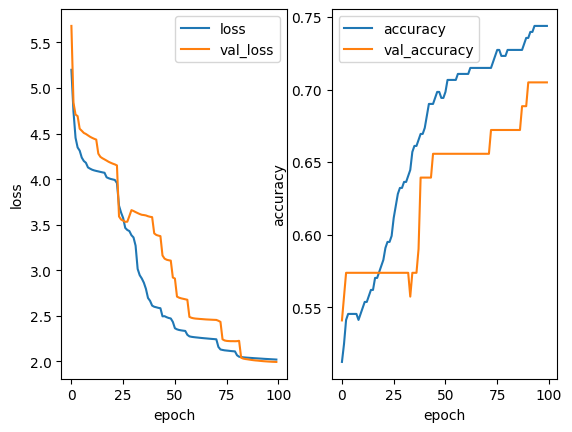

In [123]:
#za pomocą polecenia sublpot z lewej strony wyświetl loss, z prawej accuracy

plt.subplot(1,2,1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist.accuracy, label = "accuracy")
plt.plot(hist.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

In [124]:
#stwórz model o dwóch warstwach ukrytych (64 i 8). Nadaj modelowi i historii uczenia unikalną nazwę

platek_sniegu = Sequential([
        Input(shape = (13)),
        Dense(64, activation = 'relu'),
        Dense(8, activation = 'relu'),
        Dense(1)
])

In [125]:
platek_sniegu.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 64)                896       
                                                                 
 dense_40 (Dense)            (None, 8)                 520       
                                                                 
 dense_41 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,425
Trainable params: 1,425
Non-trainable params: 0
_________________________________________________________________


In [126]:
platek_sniegu.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [127]:
EPOCHS = 100

her_story = platek_sniegu.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_val, y_val))

Epoch 1/100
8/8 [==============================] - 1s 30ms/step - loss: 4.4964 - accuracy: 0.5165 - val_loss: 3.8444 - val_accuracy: 0.5246
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 2.6972 - accuracy: 0.6033 - val_loss: 2.1006 - val_accuracy: 0.5902
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 1.5060 - accuracy: 0.6777 - val_loss: 1.2513 - val_accuracy: 0.7049
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 1.0777 - accuracy: 0.7231 - val_loss: 0.9475 - val_accuracy: 0.7705
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.8755 - accuracy: 0.7645 - val_loss: 0.6859 - val_accuracy: 0.7869
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.7508 - accuracy: 0.7769 - val_loss: 0.4249 - val_accuracy: 0.8361
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6143 - accuracy: 0.7975 - val_loss: 0.3942 - val_accuracy: 0.8361
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 4ms/step - loss: 0.3513 - accuracy: 0.9132 - val_loss: 1.2061 - val_accuracy: 0.8525
Epoch 60/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3495 - accuracy: 0.9174 - val_loss: 1.2067 - val_accuracy: 0.8525
Epoch 61/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3480 - accuracy: 0.9132 - val_loss: 1.2058 - val_accuracy: 0.8525
Epoch 62/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3464 - accuracy: 0.9132 - val_loss: 1.2044 - val_accuracy: 0.8525
Epoch 63/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3448 - accuracy: 0.9132 - val_loss: 1.2073 - val_accuracy: 0.8525
Epoch 64/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3438 - accuracy: 0.9091 - val_loss: 1.2090 - val_accuracy: 0.8525
Epoch 65/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3423 - accuracy: 0.9174 - val_loss: 1.0481 - val_accuracy: 0.8525
Epoch 66/100
8/8 [===============

In [128]:
his_story = pd.DataFrame(her_story.history)
his_story

,loss,accuracy,val_loss,val_accuracy
0,4.496396,0.516529,3.844373,0.524590
1,2.697224,0.603306,2.100600,0.590164
2,1.505952,0.677686,1.251261,0.704918
3,1.077734,0.723140,0.947520,0.770492
4,0.875511,0.764463,0.685918,0.786885
...,...,...,...,...
95,0.302570,0.942149,1.434648,0.852459
96,0.301631,0.942149,1.429635,0.852459
97,0.301052,0.942149,1.264780,0.852459
98,0.299697,0.946281,1.252563,0.852459


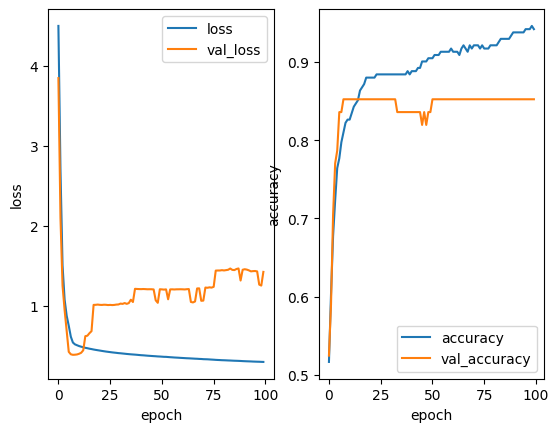

In [129]:
#za pomocą polecenia sublpot z lewej strony wyświetl loss, z prawej accuracy

plt.subplot(1,2,1)
plt.plot(his_story.loss, label = "loss")
plt.plot(his_story.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(his_story.accuracy, label = "accuracy")
plt.plot(his_story.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

In [130]:
#stwórz model o dwóch warstwach ukrytych (8 i 4). Nadaj modelowi i historii uczenia unikalną nazwę
edgy_girl = Sequential([
        Input(shape = (13)),
        Dense(8, activation = 'relu'),
        Dense(4, activation = 'relu'),
        Dense(1)
])

edgy_girl.summary()

edgy_girl.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

EPOCHS = 100

edgy_story = edgy_girl.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_val, y_val))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 8)                 112       
                                                                 
 dense_43 (Dense)            (None, 4)                 36        
                                                                 
 dense_44 (Dense)            (None, 1)                 5         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 1s 26ms/step - loss: 2.5151 - accuracy: 0.5289 - val_loss: 3.0659 - val_accuracy: 0.4918
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 2.2194 - accuracy: 0.5372 - val_loss: 2.9676 - val_accuracy: 0.4918
Epoch 3/100
8/8 [=======================

Epoch 54/100
8/8 [==============================] - 0s 6ms/step - loss: 0.9932 - accuracy: 0.7934 - val_loss: 1.6689 - val_accuracy: 0.6721
Epoch 55/100
8/8 [==============================] - 0s 5ms/step - loss: 0.9893 - accuracy: 0.7893 - val_loss: 1.6655 - val_accuracy: 0.6721
Epoch 56/100
8/8 [==============================] - 0s 5ms/step - loss: 0.9869 - accuracy: 0.7934 - val_loss: 1.6632 - val_accuracy: 0.6721
Epoch 57/100
8/8 [==============================] - 0s 4ms/step - loss: 0.9844 - accuracy: 0.7934 - val_loss: 1.6621 - val_accuracy: 0.6721
Epoch 58/100
8/8 [==============================] - 0s 4ms/step - loss: 0.9823 - accuracy: 0.7975 - val_loss: 1.4895 - val_accuracy: 0.6721
Epoch 59/100
8/8 [==============================] - 0s 5ms/step - loss: 0.9797 - accuracy: 0.7934 - val_loss: 1.4788 - val_accuracy: 0.6721
Epoch 60/100
8/8 [==============================] - 0s 5ms/step - loss: 0.9774 - accuracy: 0.7934 - val_loss: 1.4706 - val_accuracy: 0.6721
Epoch 61/100
8/8 [==

In [131]:
girl_story = pd.DataFrame(edgy_story.history)
girl_story

,loss,accuracy,val_loss,val_accuracy
0,2.515107,0.528926,3.065924,0.491803
1,2.219393,0.537190,2.967553,0.491803
2,1.966712,0.541322,2.549017,0.524590
3,1.775876,0.578512,2.467719,0.557377
4,1.626402,0.590909,2.419616,0.573770
...,...,...,...,...
95,0.802048,0.818182,1.459288,0.704918
96,0.800998,0.818182,1.450920,0.721311
97,0.799802,0.814050,1.444740,0.721311
98,0.798626,0.814050,1.439985,0.721311


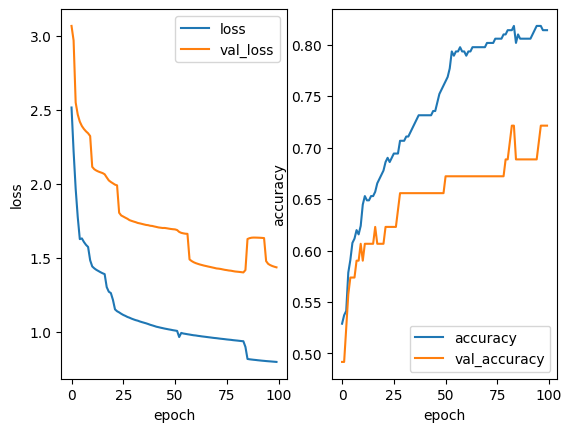

In [132]:
#za pomocą polecenia sublpot z lewej strony wyświetl loss, z prawej accuracy
plt.subplot(1,2,1)
plt.plot(girl_story.loss, label = "loss")
plt.plot(girl_story.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(girl_story.accuracy, label = "accuracy")
plt.plot(girl_story.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

In [133]:
#stwórz model o dwóch warstwach ukrytych (4 i 2). Nadaj modelowi i historii uczenia unikalną nazwę

babygirl = Sequential([
        Input(shape = (13)),
        Dense(8, activation = 'relu'),
        Dense(4, activation = 'relu'),
        Dense(1)
])

babygirl.summary()

babygirl.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

EPOCHS = 100

babyboy = babygirl.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_val, y_val))

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 8)                 112       
                                                                 
 dense_46 (Dense)            (None, 4)                 36        
                                                                 
 dense_47 (Dense)            (None, 1)                 5         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 1s 30ms/step - loss: 6.8344 - accuracy: 0.3926 - val_loss: 6.5614 - val_accuracy: 0.4098
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 6.6167 - accuracy: 0.3967 - val_loss: 5.9423 - val_accuracy: 0.4098
Epoch 3/100
8/8 [=======================

Epoch 54/100
8/8 [==============================] - 0s 4ms/step - loss: 2.1184 - accuracy: 0.5909 - val_loss: 2.5548 - val_accuracy: 0.5574
Epoch 55/100
8/8 [==============================] - 0s 4ms/step - loss: 2.1044 - accuracy: 0.5950 - val_loss: 2.5512 - val_accuracy: 0.5574
Epoch 56/100
8/8 [==============================] - 0s 4ms/step - loss: 2.0989 - accuracy: 0.5992 - val_loss: 2.5491 - val_accuracy: 0.5574
Epoch 57/100
8/8 [==============================] - 0s 4ms/step - loss: 2.0963 - accuracy: 0.5992 - val_loss: 2.5472 - val_accuracy: 0.5574
Epoch 58/100
8/8 [==============================] - 0s 4ms/step - loss: 2.0938 - accuracy: 0.5992 - val_loss: 2.5454 - val_accuracy: 0.5574
Epoch 59/100
8/8 [==============================] - 0s 4ms/step - loss: 2.0915 - accuracy: 0.6033 - val_loss: 2.5437 - val_accuracy: 0.5574
Epoch 60/100
8/8 [==============================] - 0s 4ms/step - loss: 2.0895 - accuracy: 0.6033 - val_loss: 2.5419 - val_accuracy: 0.5574
Epoch 61/100
8/8 [==

In [134]:
pi_story = pd.DataFrame(babyboy.history)
pi_story

,loss,accuracy,val_loss,val_accuracy
0,6.834364,0.392562,6.561418,0.409836
1,6.616689,0.396694,5.942291,0.409836
2,6.568521,0.400826,5.702444,0.426230
3,6.546291,0.417355,5.636253,0.426230
4,6.440598,0.417355,5.600258,0.426230
...,...,...,...,...
95,1.214418,0.665289,2.161664,0.672131
96,1.211459,0.669421,2.160490,0.672131
97,1.208767,0.669421,2.159446,0.672131
98,1.206599,0.669421,2.158467,0.672131


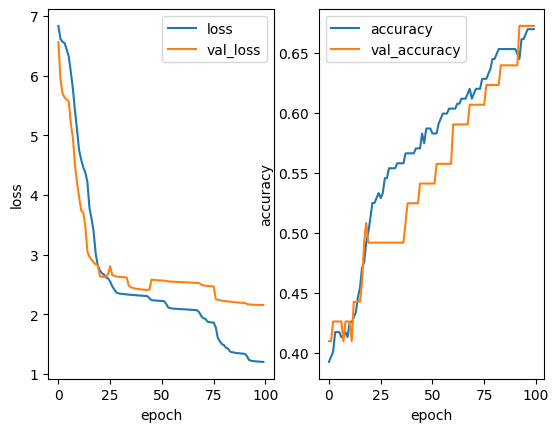

In [135]:
#za pomocą polecenia sublpot z lewej strony wyświetl loss, z prawej accuracy
plt.subplot(1,2,1)
plt.plot(pi_story.loss, label = "loss")
plt.plot(pi_story.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(pi_story.accuracy, label = "accuracy")
plt.plot(pi_story.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

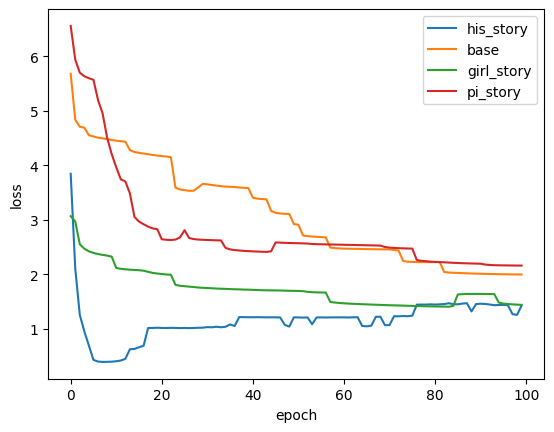

In [136]:
#zamiast hist_small, hist, hist_big, hist_tiny wstaw swoje nazwy historii uczenia

plt.plot(his_story.val_loss, label = "his_story")
plt.plot(hist.val_loss, label = "base")
plt.plot(girl_story.val_loss, label = "girl_story")
plt.plot(pi_story.val_loss, label = "pi_story")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

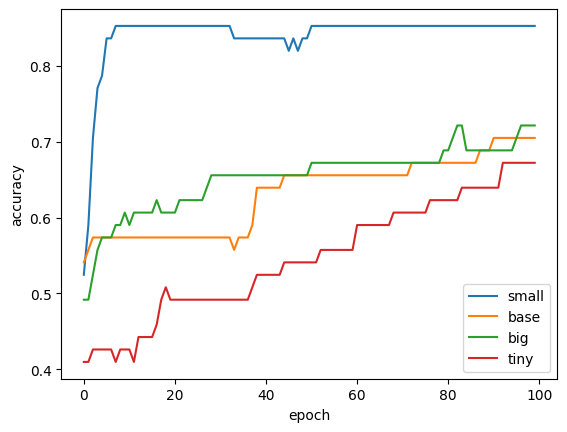

In [137]:
#zamiast hist_small, hist, hist_big, hist_tiny wstaw swoje nazwy historii uczenia
plt.plot(his_story.val_accuracy, label = "small")
plt.plot(hist.val_accuracy, label = "base")
plt.plot(girl_story.val_accuracy, label = "big")
plt.plot(pi_story.val_accuracy, label = "tiny")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

chciałoby się patrzeć na to accuracy, ale więcej informacji daje nam loss

funkcja straty na zbiorze treningowym powinna cały czas maleć - kiedy zaczyna rosnąć, to znaczy, że model przestał się uczyć

żeby się upewnić co do przeuczenia, patrzymy na accuracy

val_loss - spada, rośnie i znowu zaczyna spadać
parametr wczesnego zatrzymania - ustawiamy, zeby komputer sam wykrył moment przeuczenia; ale ustawiamy też coś takiego jak cierpliwość (nasza sieć może pozwolić sobie na określoną ilość epok, w których wartość loss nie spada, jeśli ta wartość zostanie przekroczona, czyli cierpliwość naszej sieci się skończy, to model kończy uczenie)